In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import plotly.graph_objects as go
import plotly.express as px

from statsmodels.nonparametric.smoothers_lowess import lowess

from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
regions = ['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA']

In [10]:
df = pd.read_csv('QL_iso.csv')
df

Date  Estimated_fire_area_QL  Count_QL  mean_Precipitation_QL  \
0     2005-01-01               38.831579      19.0               1.453053   
1     2005-01-02               64.464286      28.0               1.544607   
2     2005-01-03               47.386585      41.0               3.307646   
3     2005-01-04               30.100000      24.0               7.174250   
4     2005-01-05                4.000000       4.0              11.410645   
...          ...                     ...       ...                    ...   
5847  2021-01-04                1.000000       1.0                    NaN   
5848  2021-01-05                2.080000       1.0                    NaN   
5849  2021-01-06               14.541818      11.0                    NaN   
5850  2021-01-07                0.000000       0.0                    NaN   
5851  2021-01-08                4.533333       3.0                    NaN   

      mean_RelativeHumidity_QL  mean_SoilWaterContent_QL  \
0                    47.959364                  0.185641   
1                    48.593844                  0.177612   
2                    54.993082                  0.180547   
3                    68.853479                  0.221695   
4                    69.268049                  0.259284   
...                        ...                       ...   
5847                       NaN                       NaN   
5848                       NaN                       NaN   
5849                       NaN                       NaN   
5850                       NaN                       NaN   
5851                       NaN                       NaN   

      mean_SolarRadiation_QL  mean_Temperature_QL  mean_WindSpeed_QL  \
0                  27.056979            28.842866           3.483753   
1                  26.276294            29.416449           3.145954   
2                  25.261123            29.837556           3.376279   
3                  19.133625            27.344346           3.087130   
4                  17.328773            26.426117           3.159938   
...                      ...                  ...                ...   
5847                     NaN                  NaN                NaN   
5848                     NaN                  NaN                NaN   
5849                     NaN                  NaN                NaN   
5850                     NaN                  NaN                NaN   
5851                     NaN                  NaN                NaN   

      Vegetation_index_mean_QL  
0                     0.321503  
1                     0.322350  
2                     0.323152  
3                     0.324012  
4                     0.324841  
...                        ...  
5847                       NaN  
5848                       NaN  
5849                       NaN  
5850                       NaN  
5851                       NaN  

[5852 rows x 10 columns]

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['t_plus_1'] = df['Estimated_fire_area_QL'].shift(-1)
df.dropna(inplace=True)
df

Date  Estimated_fire_area_QL  Count_QL  mean_Precipitation_QL  \
0    2005-01-01               38.831579      19.0               1.453053   
1    2005-01-02               64.464286      28.0               1.544607   
2    2005-01-03               47.386585      41.0               3.307646   
3    2005-01-04               30.100000      24.0               7.174250   
4    2005-01-05                4.000000       4.0              11.410645   
...         ...                     ...       ...                    ...   
5841 2020-12-29                2.200000       2.0              14.543703   
5842 2020-12-30                7.392000       5.0               7.719041   
5843 2020-12-31                3.200000       3.0               6.056160   
5844 2021-01-01                1.000000       1.0               7.057093   
5845 2021-01-02                7.637500       4.0               5.391618   

      mean_RelativeHumidity_QL  mean_SoilWaterContent_QL  \
0                    47.959364                  0.185641   
1                    48.593844                  0.177612   
2                    54.993082                  0.180547   
3                    68.853479                  0.221695   
4                    69.268049                  0.259284   
...                        ...                       ...   
5841                 74.121019                  0.291153   
5842                 69.119019                  0.284380   
5843                 65.560411                  0.267056   
5844                 66.154832                  0.257307   
5845                 66.077076                  0.253164   

      mean_SolarRadiation_QL  mean_Temperature_QL  mean_WindSpeed_QL  \
0                  27.056979            28.842866           3.483753   
1                  26.276294            29.416449           3.145954   
2                  25.261123            29.837556           3.376279   
3                  19.133625            27.344346           3.087130   
4                  17.328773            26.426117           3.159938   
...                      ...                  ...                ...   
5841               17.040969            25.670756           2.656898   
5842               20.031469            26.867358           3.312641   
5843               20.142999            27.694256           3.433646   
5844               20.684816            27.847187           3.105038   
5845               22.950681            27.992916           2.857709   

      Vegetation_index_mean_QL   t_plus_1  
0                     0.321503  64.464286  
1                     0.322350  47.386585  
2                     0.323152  30.100000  
3                     0.324012   4.000000  
4                     0.324841   6.050000  
...                        ...        ...  
5841                  0.324692   7.392000  
5842                  0.325933   3.200000  
5843                  0.327252   1.000000  
5844                  0.328527   7.637500  
5845                  0.329919   5.133333  

[5846 rows x 11 columns]

In [12]:
df['sqrt_area_QL'] = np.sqrt(df['Estimated_fire_area_QL'])
df['sqrt_area_count'] = np.sqrt(df['Estimated_fire_area_QL'] / df['Count_QL']) * df['Count_QL']
df

Date  Estimated_fire_area_QL  Count_QL  mean_Precipitation_QL  \
0    2005-01-01               38.831579      19.0               1.453053   
1    2005-01-02               64.464286      28.0               1.544607   
2    2005-01-03               47.386585      41.0               3.307646   
3    2005-01-04               30.100000      24.0               7.174250   
4    2005-01-05                4.000000       4.0              11.410645   
...         ...                     ...       ...                    ...   
5841 2020-12-29                2.200000       2.0              14.543703   
5842 2020-12-30                7.392000       5.0               7.719041   
5843 2020-12-31                3.200000       3.0               6.056160   
5844 2021-01-01                1.000000       1.0               7.057093   
5845 2021-01-02                7.637500       4.0               5.391618   

      mean_RelativeHumidity_QL  mean_SoilWaterContent_QL  \
0                    47.959364                  0.185641   
1                    48.593844                  0.177612   
2                    54.993082                  0.180547   
3                    68.853479                  0.221695   
4                    69.268049                  0.259284   
...                        ...                       ...   
5841                 74.121019                  0.291153   
5842                 69.119019                  0.284380   
5843                 65.560411                  0.267056   
5844                 66.154832                  0.257307   
5845                 66.077076                  0.253164   

      mean_SolarRadiation_QL  mean_Temperature_QL  mean_WindSpeed_QL  \
0                  27.056979            28.842866           3.483753   
1                  26.276294            29.416449           3.145954   
2                  25.261123            29.837556           3.376279   
3                  19.133625            27.344346           3.087130   
4                  17.328773            26.426117           3.159938   
...                      ...                  ...                ...   
5841               17.040969            25.670756           2.656898   
5842               20.031469            26.867358           3.312641   
5843               20.142999            27.694256           3.433646   
5844               20.684816            27.847187           3.105038   
5845               22.950681            27.992916           2.857709   

      Vegetation_index_mean_QL   t_plus_1  sqrt_area_QL  sqrt_area_count  
0                     0.321503  64.464286      6.231499        27.162474  
1                     0.322350  47.386585      8.028965        42.485292  
2                     0.323152  30.100000      6.883791        44.077772  
3                     0.324012   4.000000      5.486347        26.877500  
4                     0.324841   6.050000      2.000000         4.000000  
...                        ...        ...           ...              ...  
5841                  0.324692   7.392000      1.483240         2.097618  
5842                  0.325933   3.200000      2.718823         6.079474  
5843                  0.327252   1.000000      1.788854         3.098387  
5844                  0.328527   7.637500      1.000000         1.000000  
5845                  0.329919   5.133333      2.763603         5.527205  

[5846 rows x 13 columns]

In [13]:
df.head(10)

Date  Estimated_fire_area_QL  Count_QL  mean_Precipitation_QL  \
0 2005-01-01               38.831579      19.0               1.453053   
1 2005-01-02               64.464286      28.0               1.544607   
2 2005-01-03               47.386585      41.0               3.307646   
3 2005-01-04               30.100000      24.0               7.174250   
4 2005-01-05                4.000000       4.0              11.410645   
5 2005-01-06                6.050000       5.0              12.458772   
6 2005-01-07               10.206000       5.0               7.385902   
7 2005-01-08               51.531429      28.0               4.622862   
8 2005-01-09               84.927027      37.0               3.914671   
9 2005-01-10              106.500000      60.0               2.391509   

   mean_RelativeHumidity_QL  mean_SoilWaterContent_QL  mean_SolarRadiation_QL  \
0                 47.959364                  0.185641               27.056979   
1                 48.593844                  0.177612               26.276294   
2                 54.993082                  0.180547               25.261123   
3                 68.853479                  0.221695               19.133625   
4                 69.268049                  0.259284               17.328773   
5                 69.399349                  0.297847               18.180887   
6                 56.952118                  0.296490               22.676961   
7                 54.591789                  0.285276               24.549683   
8                 55.175177                  0.267636               25.306449   
9                 51.756593                  0.248010               26.760756   

   mean_Temperature_QL  mean_WindSpeed_QL  Vegetation_index_mean_QL  \
0            28.842866           3.483753                  0.321503   
1            29.416449           3.145954                  0.322350   
2            29.837556           3.376279                  0.323152   
3            27.344346           3.087130                  0.324012   
4            26.426117           3.159938                  0.324841   
5            25.906262           3.414364                  0.325679   
6            26.510964           3.836343                  0.326453   
7            26.878679           3.797382                  0.327278   
8            27.526661           3.851182                  0.328019   
9            27.463755           3.859442                  0.328699   

     t_plus_1  sqrt_area_QL  sqrt_area_count  
0   64.464286      6.231499        27.162474  
1   47.386585      8.028965        42.485292  
2   30.100000      6.883791        44.077772  
3    4.000000      5.486347        26.877500  
4    6.050000      2.000000         4.000000  
5   10.206000      2.459675         5.500000  
6   51.531429      3.194683         7.143529  
7   84.927027      7.178539        37.985260  
8  106.500000      9.215586        56.056222  
9  165.998382     10.319884        79.937476

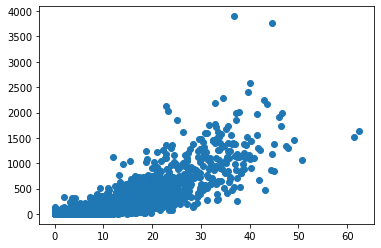

In [14]:
plt.scatter(df['sqrt_area_QL'], df['t_plus_1'])

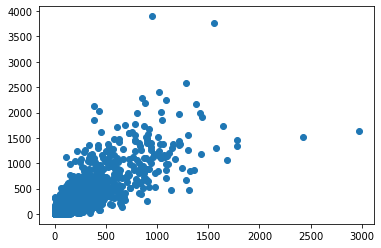

In [15]:
plt.scatter(df['sqrt_area_count'], df['t_plus_1'])

In [18]:
df.columns.drop('t_plus_1')

Index(['Date', 'Estimated_fire_area_QL', 'Count_QL', 'mean_Precipitation_QL',
       'mean_RelativeHumidity_QL', 'mean_SoilWaterContent_QL',
       'mean_SolarRadiation_QL', 'mean_Temperature_QL', 'mean_WindSpeed_QL',
       'Vegetation_index_mean_QL', 'sqrt_area_QL', 'sqrt_area_count'],
      dtype='object')

In [ ]:
for each in regions:
    print('----' * 30)
    print('----' * 10, each, '----' * 19)
    print('----' * 30)
    df = pd.read_csv('{}_iso.csv'.format(each))
    df['Date'] = pd.to_datetime(df['Date'])

    for x in df.columns:
        df[x] = df[x].fillna(method='ffill')
    
    df.set_index('Date', inplace=True)
    
    
    

    
    
    df['t_plus_1'] = df['Estimated_fire_area_{}'.format(each)].shift(-1)
    df['sqrt_area_{}'.format(each)] = np.sqrt(df['Estimated_fire_area_{}'.format(each)])
    df['sqrt_area_count'] = np.sqrt(df['Estimated_fire_area_{}'.format(each)] / df['Count_{}'.format(each)]) * df['Count_{}'.format(each)]
    columns = df.columns.drop('t_plus_1')

    
    
    df['day'] = df.index.dayofyear
    df['_index'] = range(len(df))
    
    yhat = lowess(df['Estimated_fire_area_{}'.format(each)], df['_index'], frac = 1/50)

    plt.figure(figsize=(14,10))
    plt.scatter(df['_index'], df['Estimated_fire_area_{}'.format(each)], alpha = 0.3, label = 'estimated_fire_area')
    plt.plot(yhat.T[0], yhat.T[1], color = 'r', label = 'lowess 1/50')
    plt.xticks(df.loc[df['day'].eq(1)]['_index'].values,
              labels = df.loc[df['day'].eq(1)].index.year)
    plt.legend(loc='upper right')
    plt.ylabel(each)
    
    plt.show()

    
    
    df.iloc[:, :8].plot(subplots = True, figsize=(14,10))
    plt.show()

    print('----' * 30)
    
    
    fig, ax = plt.subplots(nrows = 6, ncols = 2, figsize = (14,20))
    for i, x in enumerate(columns):

        
        yhat = lowess(df.dropna()['t_plus_1'], df.dropna()[x], frac = 1/20)
        ax[i//2][i%2].plot(yhat.T[0], yhat.T[1], color = 'r')
        ax[i//2][i%2].scatter(df.dropna()[x], df.dropna()['t_plus_1'], alpha = 0.4)
        ax[i//2][i%2].set_xlabel(x)
        ax[i//2][i%2].set_ylabel('t_plus_1')

    plt.show()
    
    print('----' * 30)
    
    corr = df.iloc[:, :9].corr()

    sns.heatmap(corr, cmap = 'RdYlBu', vmin = -1, vmax = 1)
    plt.title('Correlation Heatmap for {}'.format(each))
    plt.show()
    
    
    fig, ax = plt.subplots(figsize=(14,10))
    plot_pacf(df['Estimated_fire_area_{}'.format(each)], lags = 100, ax = ax)

    ax.set_title('Partial Autocorrelation for {}'.format(each))
    plt.show();

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- NSW ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


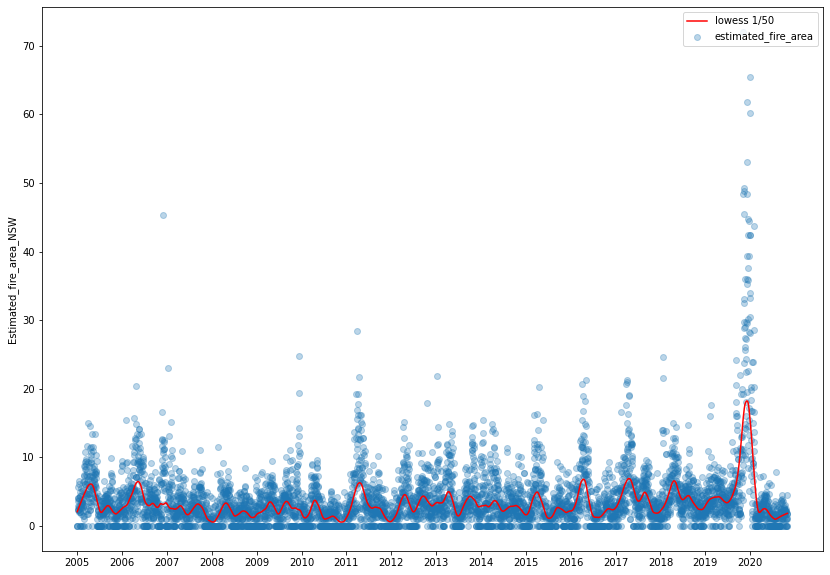

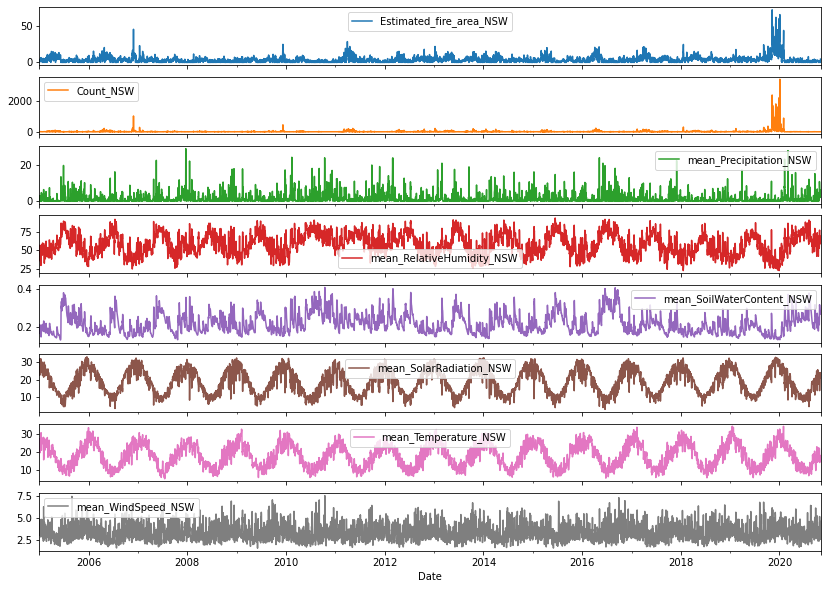

------------------------------------------------------------------------------------------------------------------------


C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide



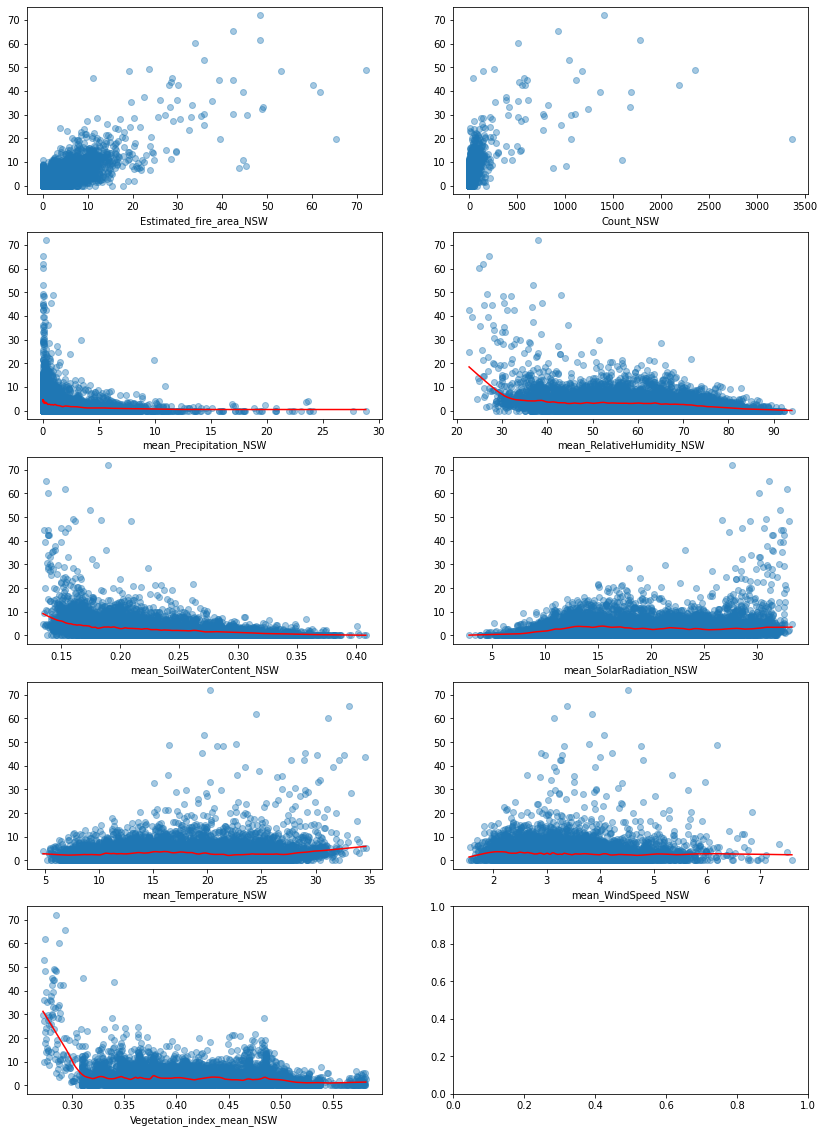

------------------------------------------------------------------------------------------------------------------------


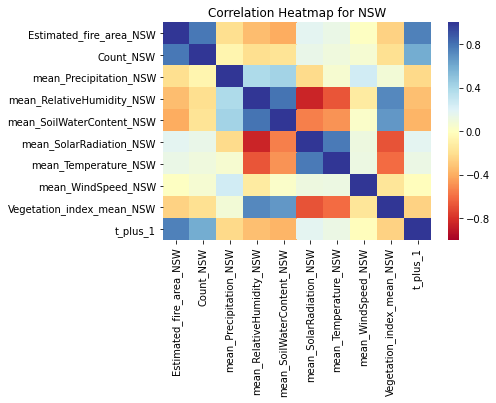

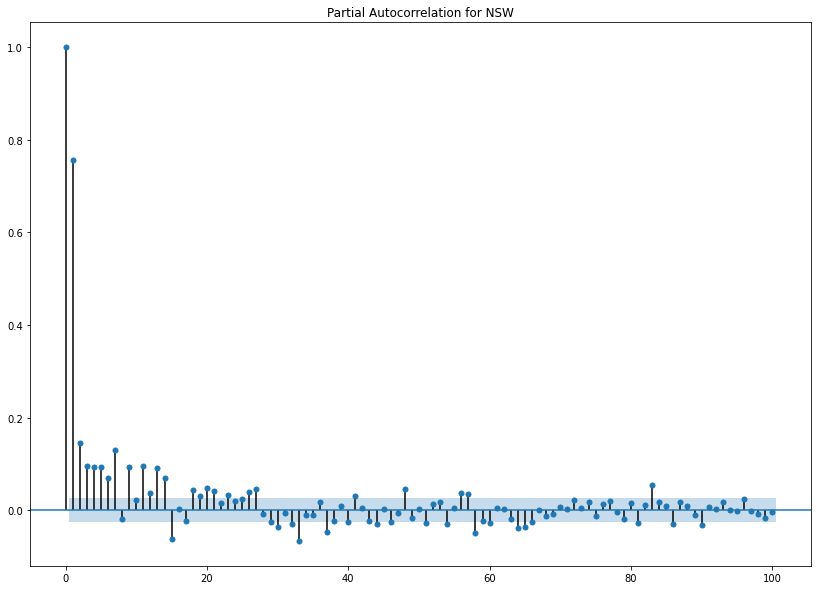

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- NT ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


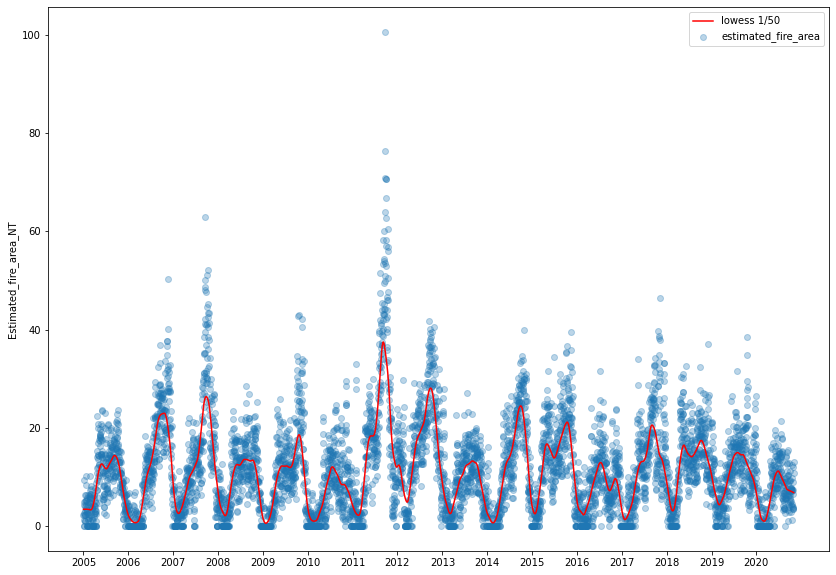

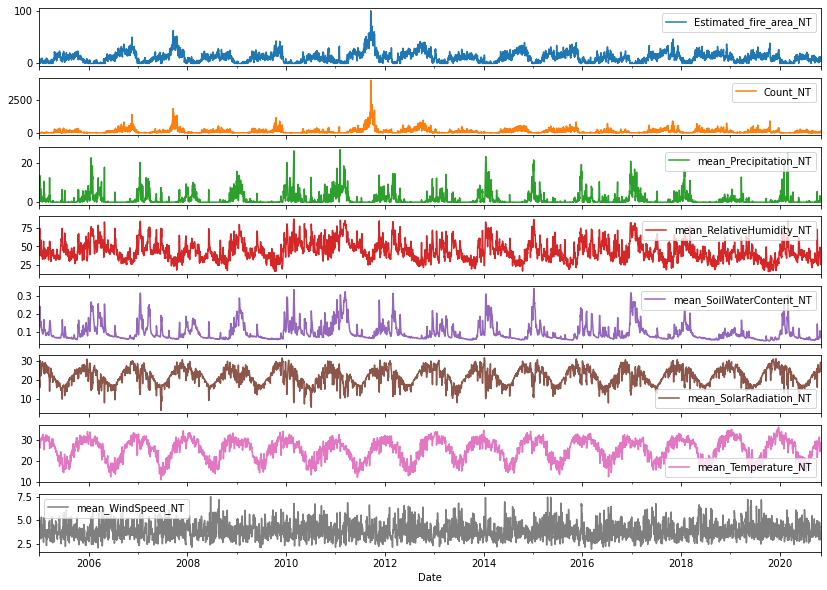

------------------------------------------------------------------------------------------------------------------------


C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide



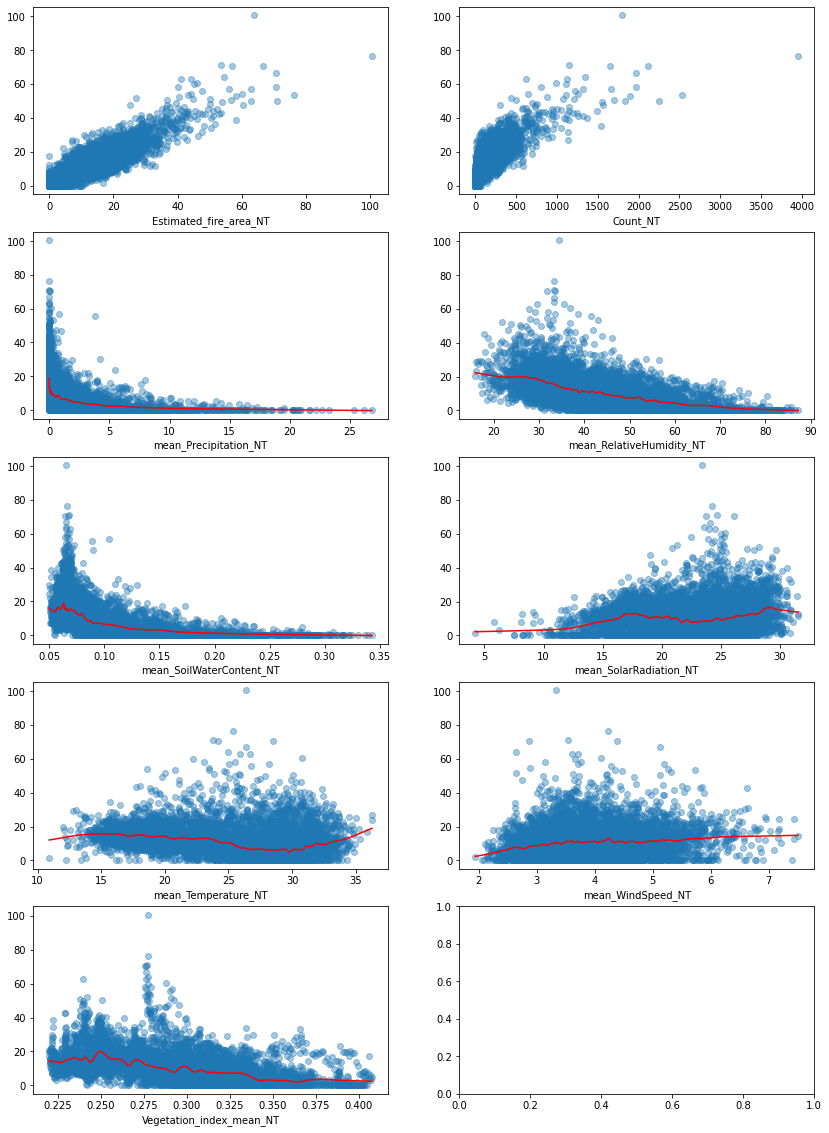

------------------------------------------------------------------------------------------------------------------------


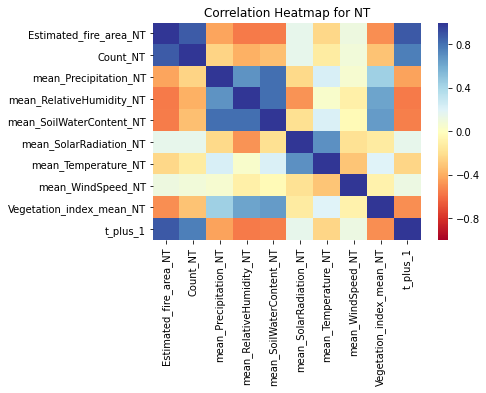

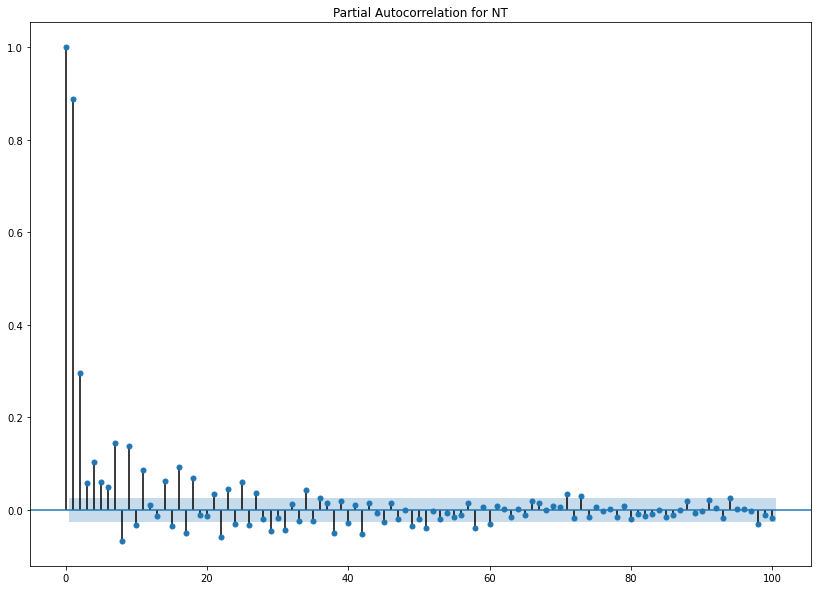

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- QL ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


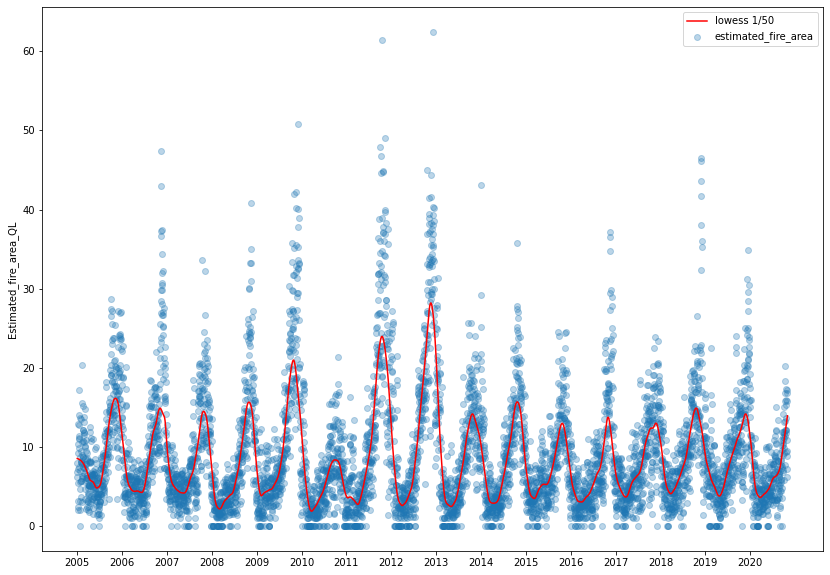

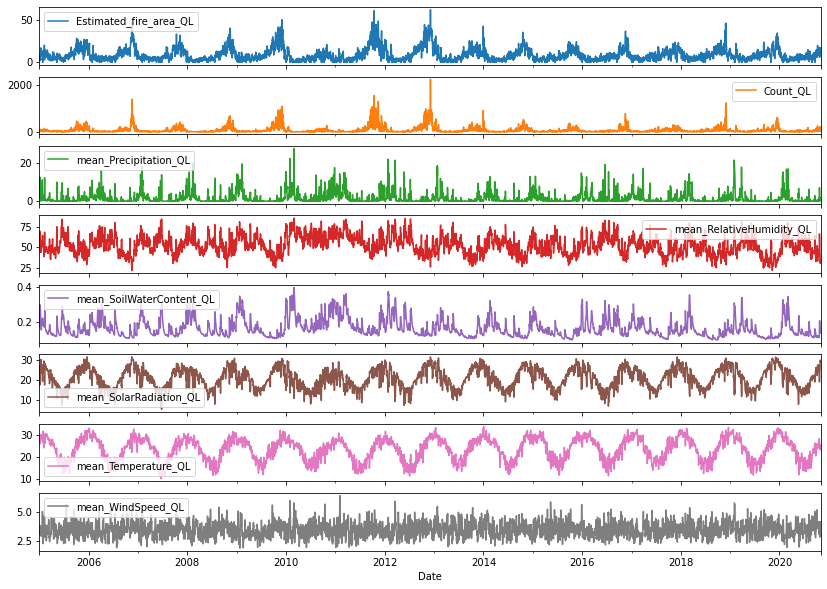

------------------------------------------------------------------------------------------------------------------------


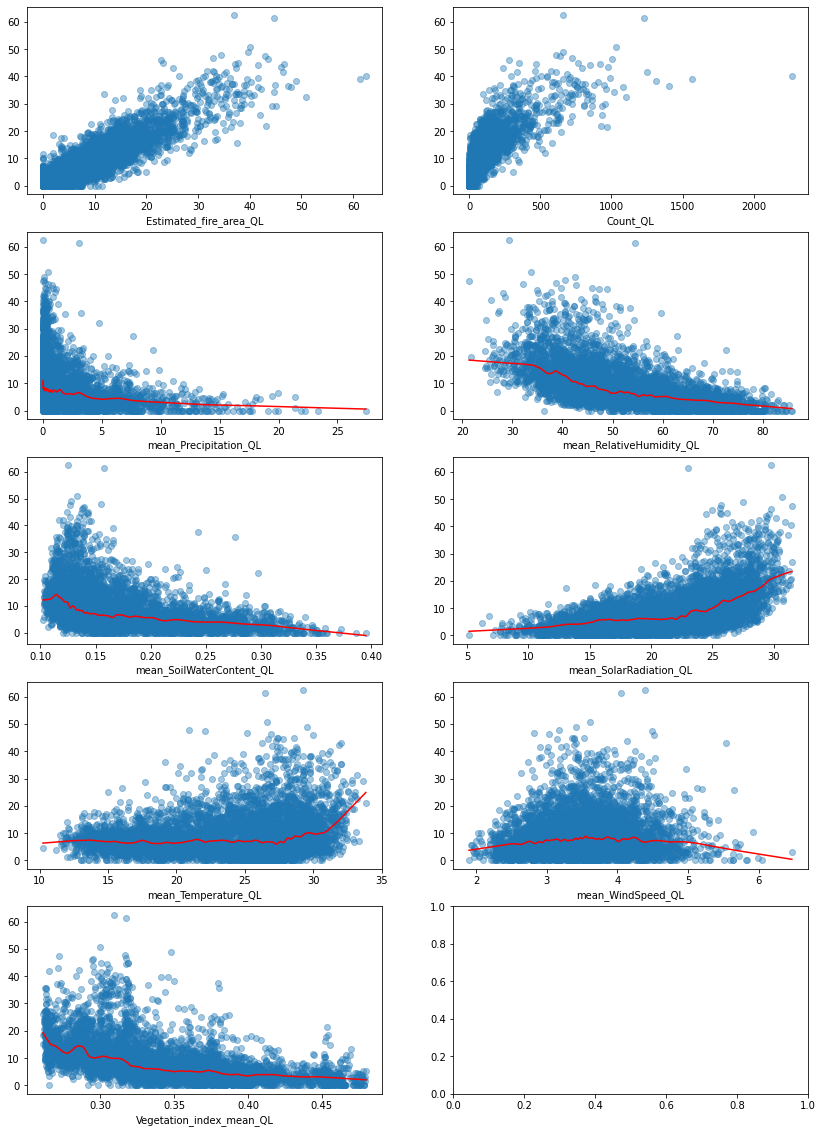

------------------------------------------------------------------------------------------------------------------------


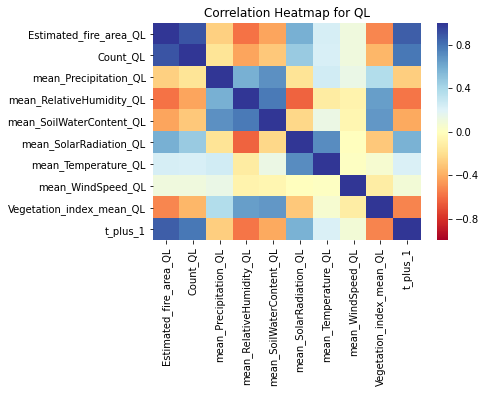

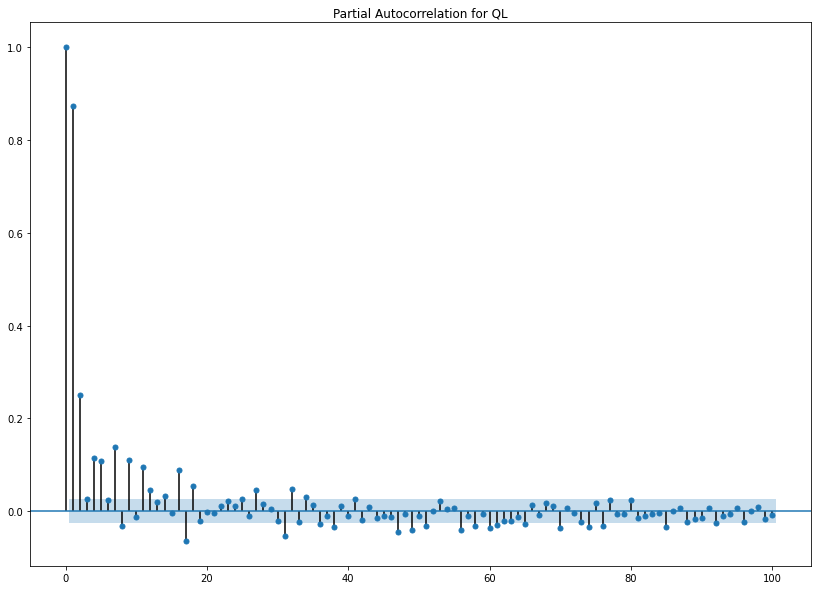

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- SA ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


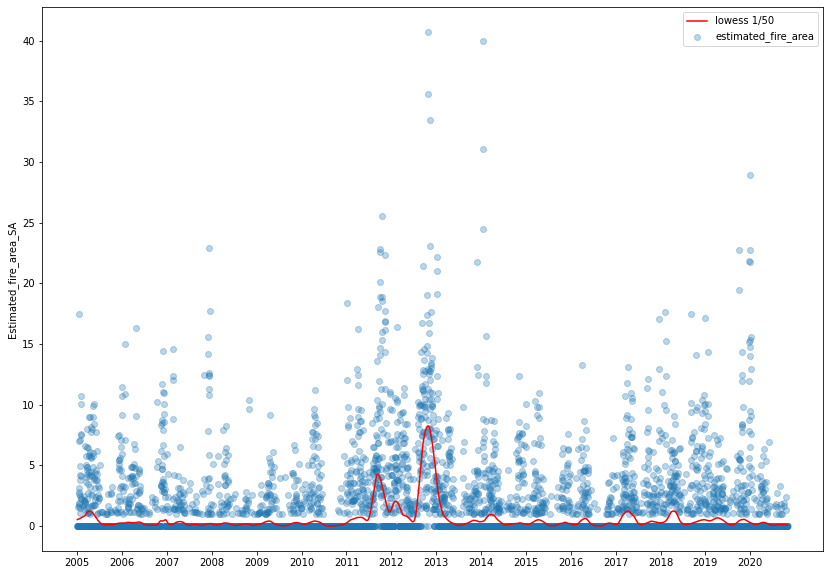

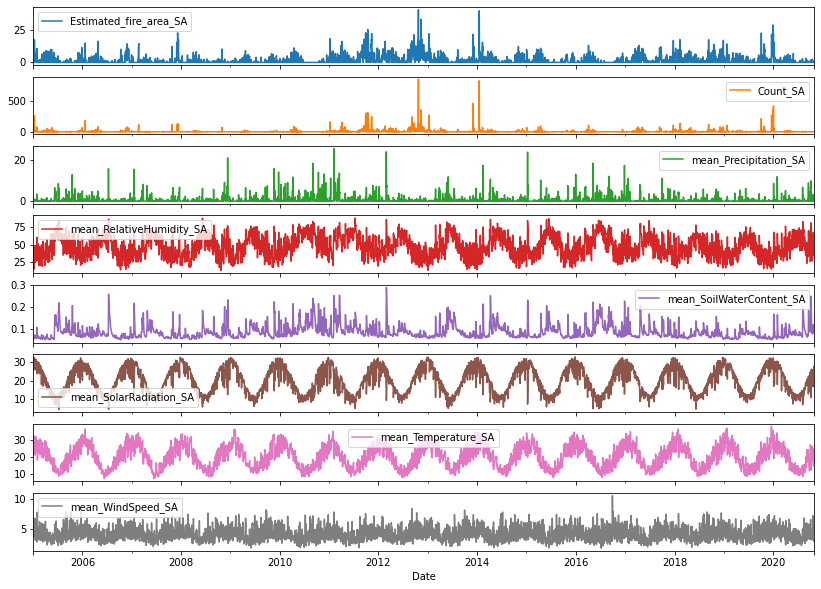

------------------------------------------------------------------------------------------------------------------------


C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide



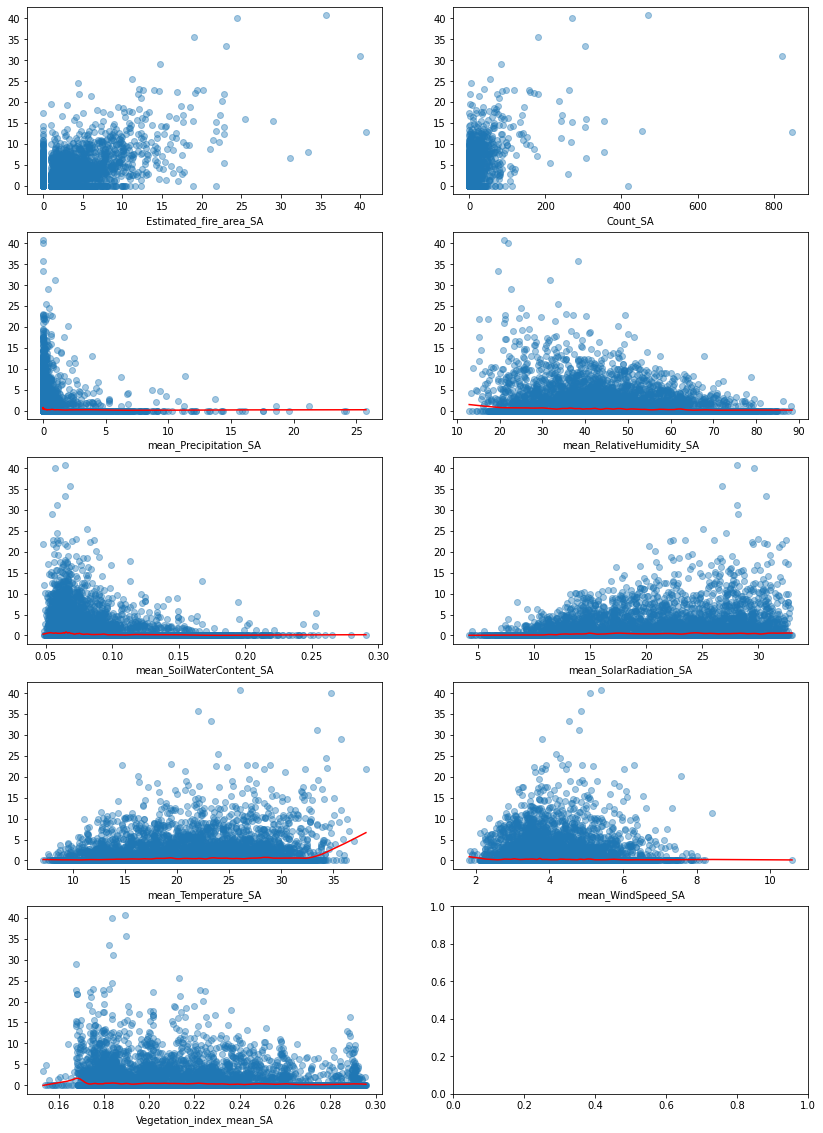

------------------------------------------------------------------------------------------------------------------------


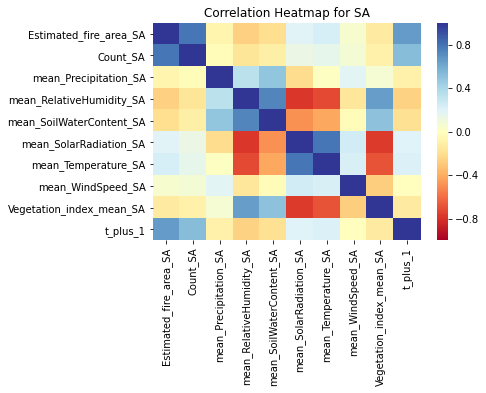

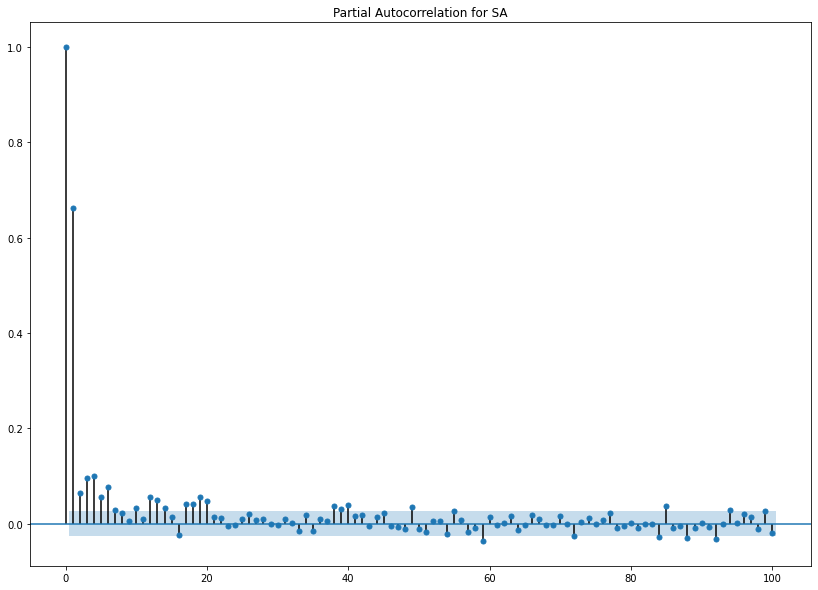

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- TA ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


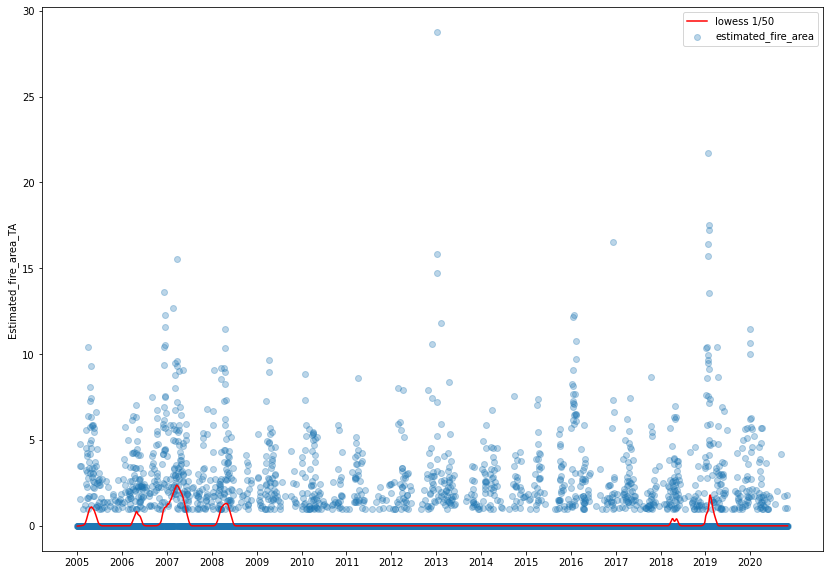

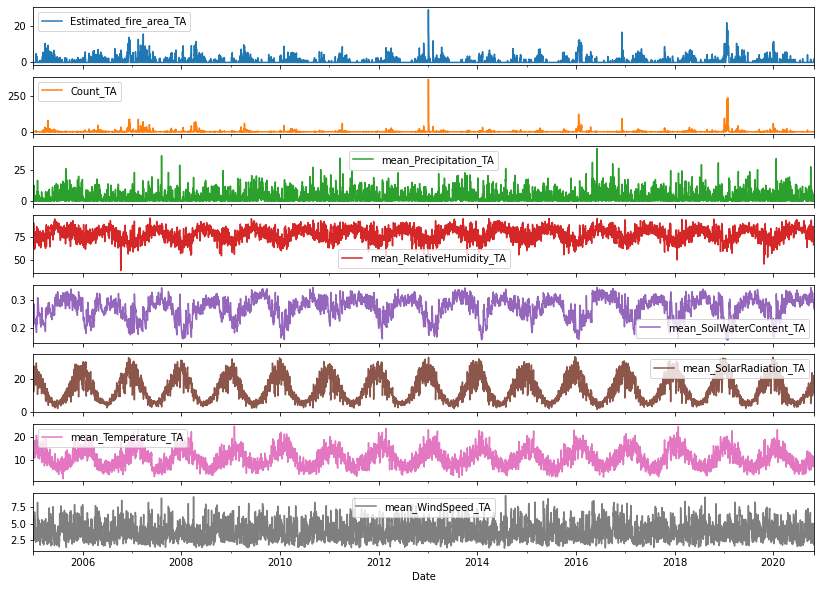

------------------------------------------------------------------------------------------------------------------------


C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide



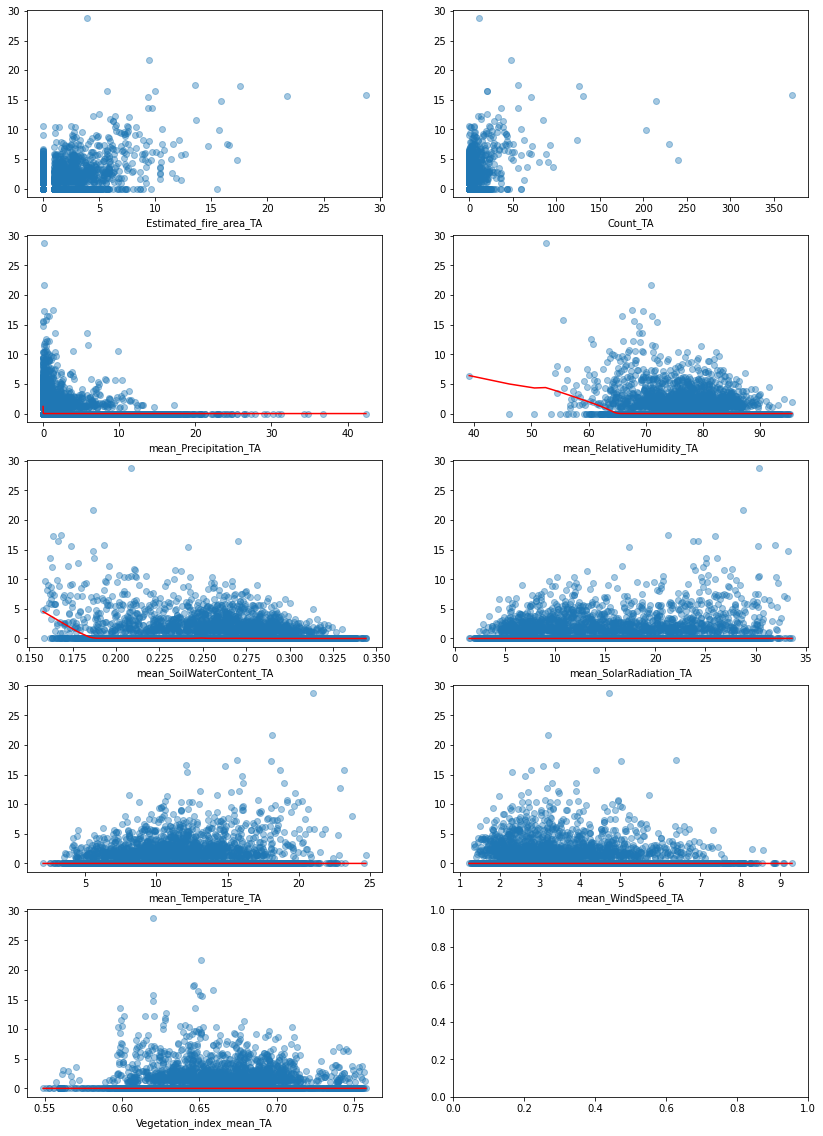

------------------------------------------------------------------------------------------------------------------------


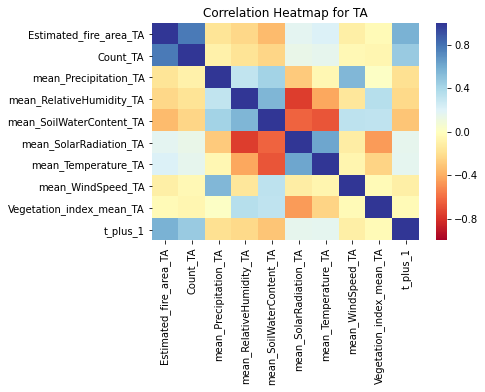

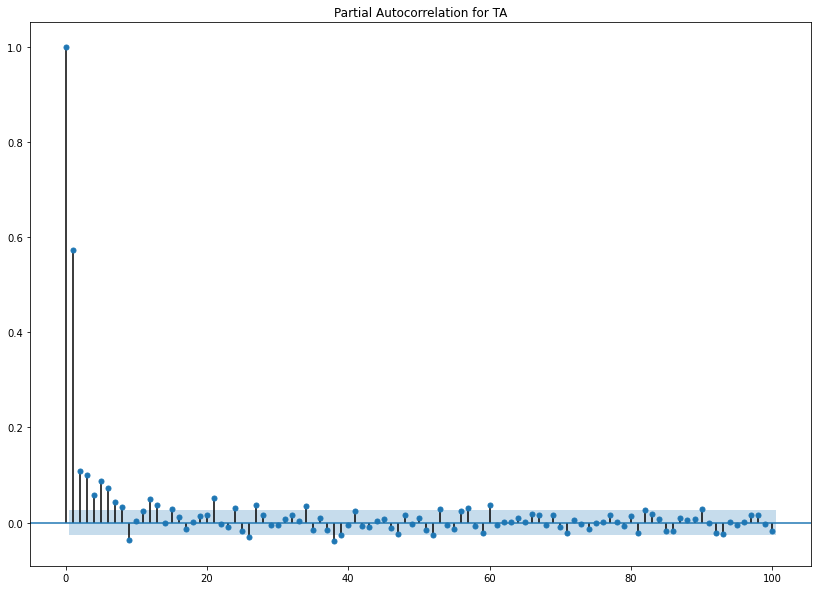

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- VI ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


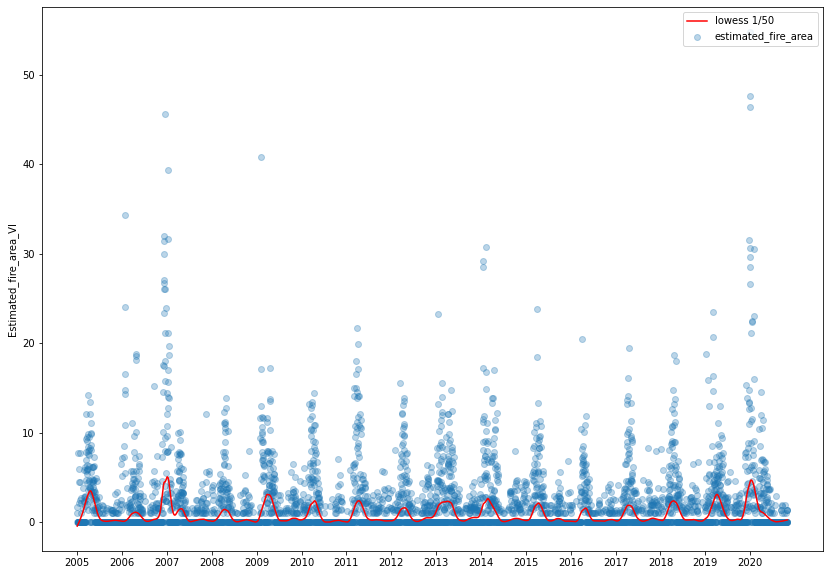

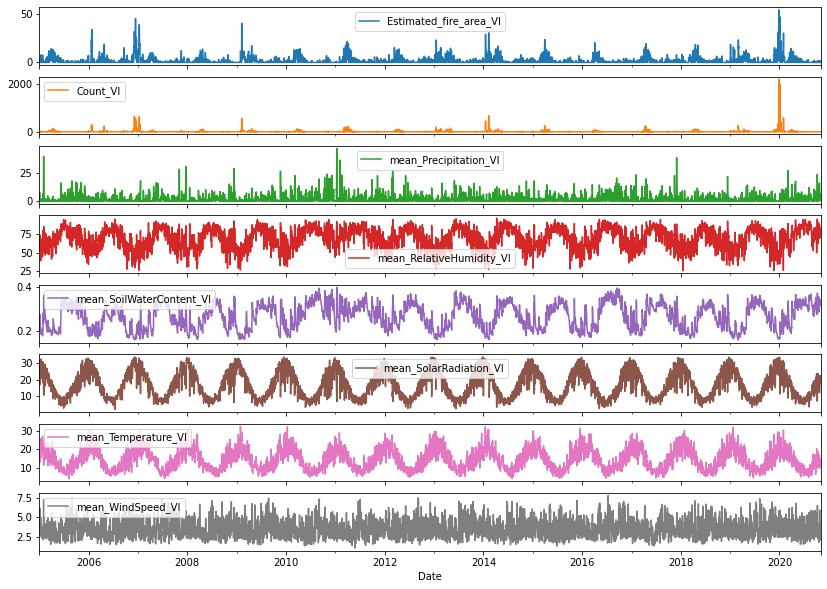

------------------------------------------------------------------------------------------------------------------------


C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide



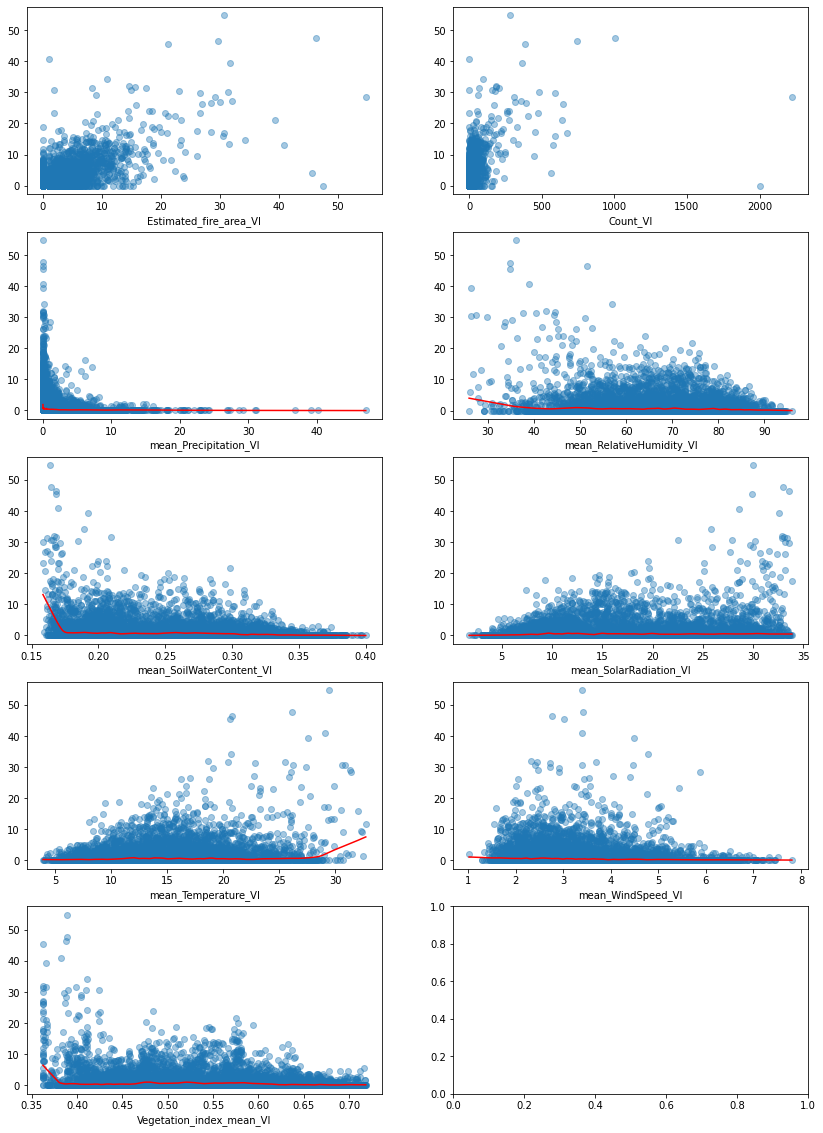

------------------------------------------------------------------------------------------------------------------------


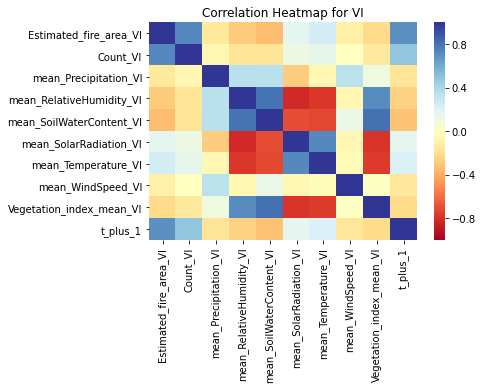

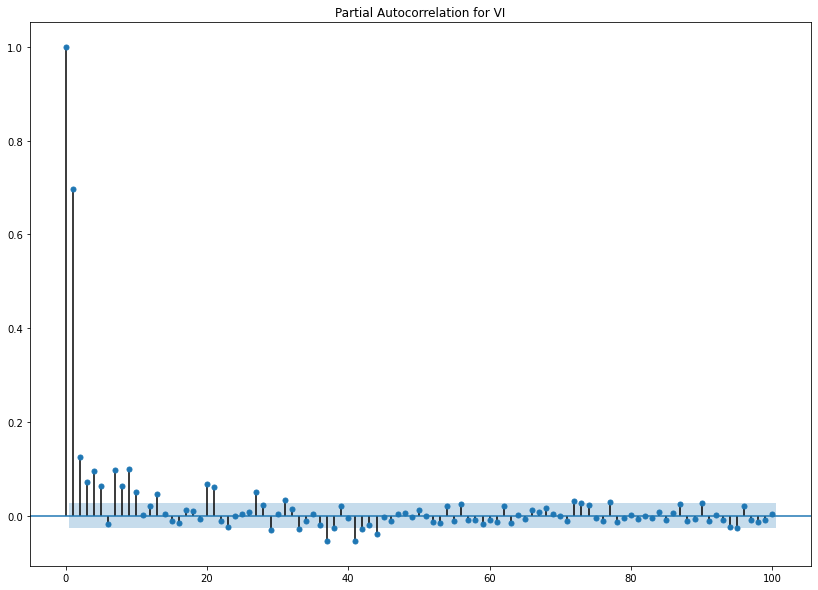

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- WA ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


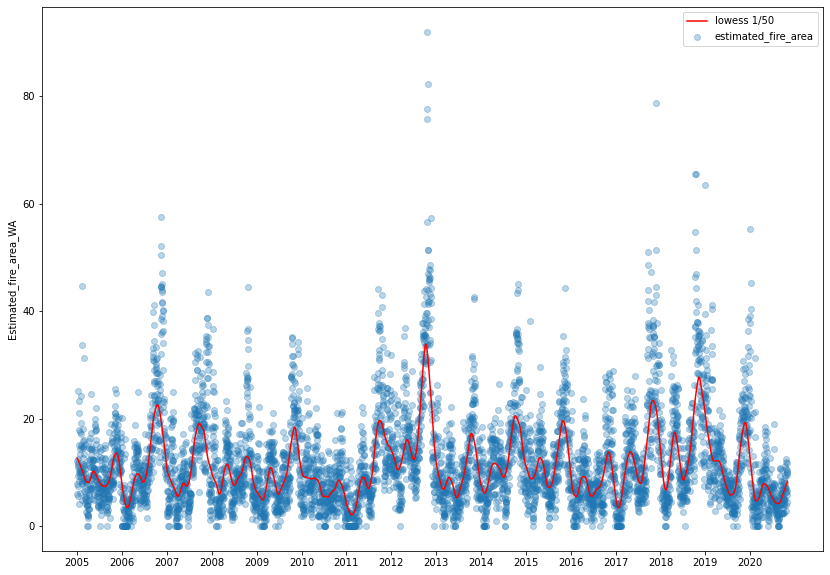

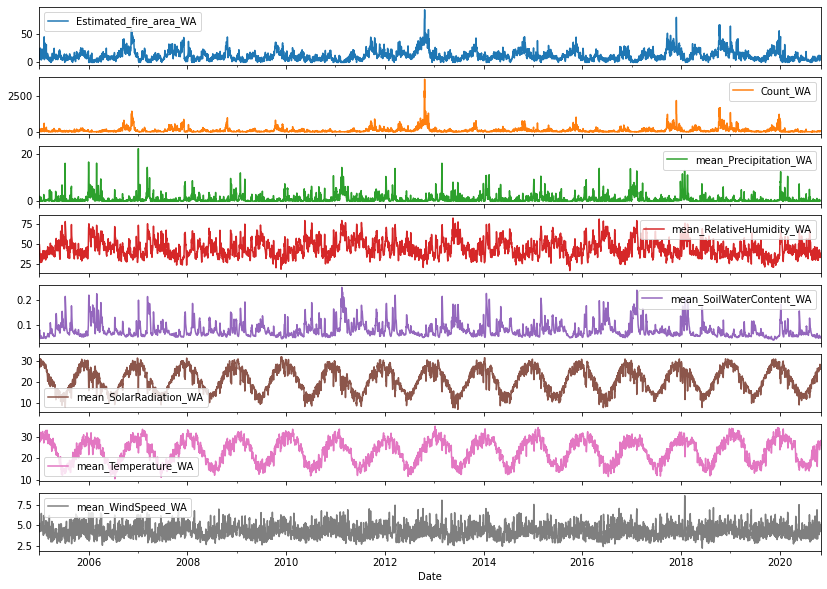

------------------------------------------------------------------------------------------------------------------------


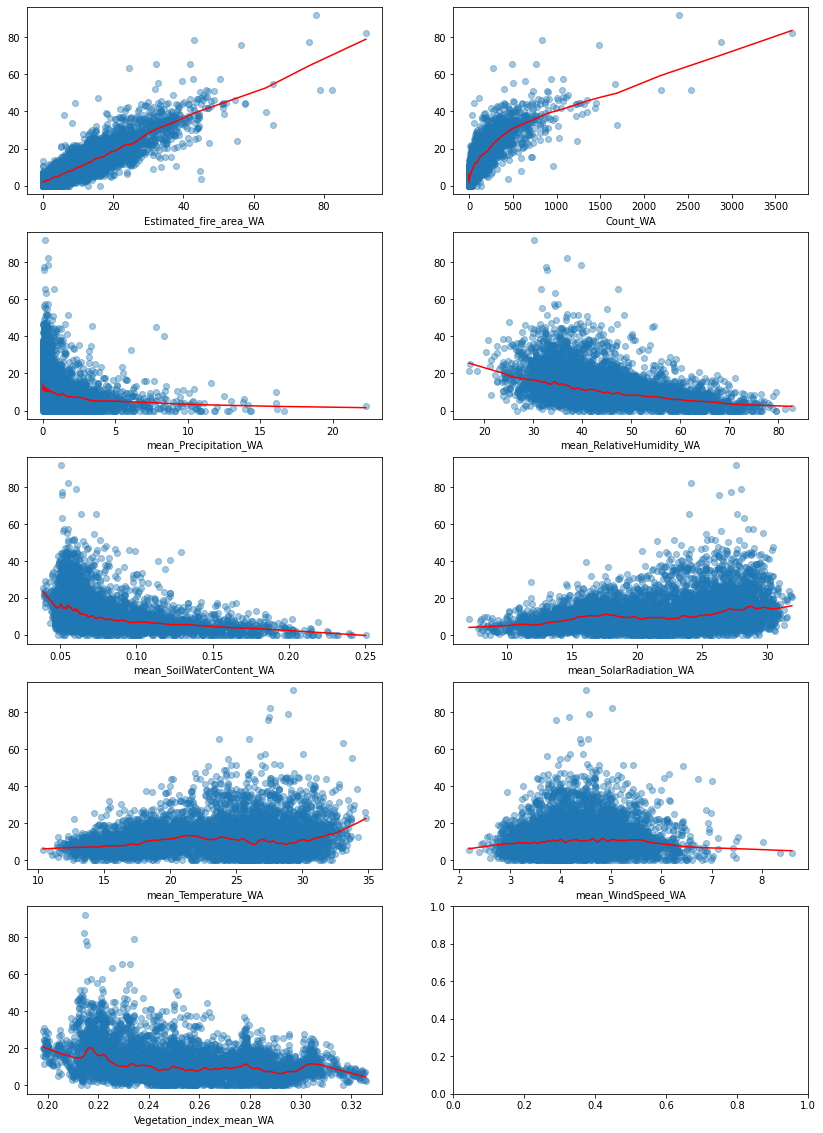

------------------------------------------------------------------------------------------------------------------------


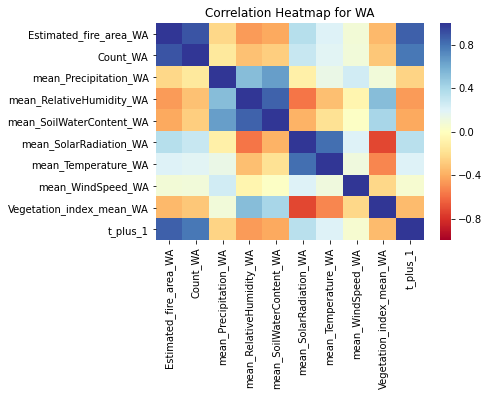

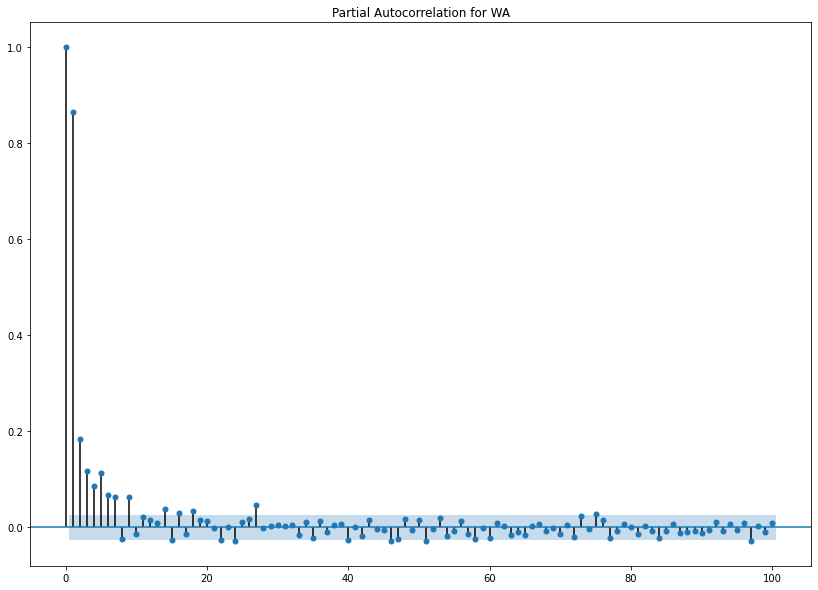

In [17]:
for each in regions:
    print('----' * 30)
    print('----' * 10, each, '----' * 19)
    print('----' * 30)
    df = pd.read_csv('{}_iso.csv'.format(each))
    df['Date'] = pd.to_datetime(df['Date'])
    df['Estimated_fire_area_{}'.format(each)] = df['Estimated_fire_area_{}'.format(each)].fillna(0)
    for x in df.columns:
        df[x] = df[x].fillna(method='ffill')
    
    df.set_index('Date', inplace=True)
    
    #plot for square roots instead
    df['Estimated_fire_area_{}'.format(each)] = np.sqrt(df['Estimated_fire_area_{}'.format(each)])
    

    
    columns = df.columns
    df['t_plus_1'] = df['Estimated_fire_area_{}'.format(each)].shift(-1)
    
    

    
    
    df['day'] = df.index.dayofyear
    df['_index'] = range(len(df))
    
    yhat = lowess(df['Estimated_fire_area_{}'.format(each)], df['_index'], frac = 1/50)

    plt.figure(figsize=(14,10))
    plt.scatter(df['_index'], df['Estimated_fire_area_{}'.format(each)], alpha = 0.3, label = 'estimated_fire_area')
    plt.plot(yhat.T[0], yhat.T[1], color = 'r', label = 'lowess 1/50')
    plt.xticks(df.loc[df['day'].eq(1)]['_index'].values,
              labels = df.loc[df['day'].eq(1)].index.year)
    plt.legend(loc='upper right')
    plt.ylabel('Estimated_fire_area_{}'.format(each))
    
    plt.show()

    
    
    df.iloc[:, :8].plot(subplots = True, figsize=(14,10))
    plt.show()

    print('----' * 30)
    
    
    fig, ax = plt.subplots(nrows = 5, ncols = 2, figsize = (14,20))
    for i, x in enumerate(columns):

        
        yhat = lowess(df.dropna()['t_plus_1'], df.dropna()[x], frac = 1/20)
        ax[i//2][i%2].plot(yhat.T[0], yhat.T[1], color = 'r')
        ax[i//2][i%2].scatter(df.dropna()[x], df.dropna()['t_plus_1'], alpha = 0.4)
        ax[i//2][i%2].set_xlabel(x)
        


    plt.show()
    
    print('----' * 30)
    
    corr = df.iloc[:, :10].corr()

    sns.heatmap(corr, cmap = 'RdYlBu', vmin = -1, vmax = 1)
    plt.title('Correlation Heatmap for {}'.format(each))
    plt.show()
    
    
    fig, ax = plt.subplots(figsize=(14,10))
    plot_pacf(df['Estimated_fire_area_{}'.format(each)], lags = 100, ax = ax)

    ax.set_title('Partial Autocorrelation for {}'.format(each))
    plt.show();